Required Modules

In [75]:
#Heart Disease Prediction Using XGBoost and SHAP Explainability:
#An Enhanced Machine Learning Approach for E-Healthcare
#Reference :https://archive.ics.uci.edu/ml/datasets/heart+Disease
#Author Sudarshan D ,jatin D
#Revision : 15 may 2025
#  Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')



In [72]:

# Load the CSV file
df = pd.read_csv('processed_cleveland.csv')

# Show the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1.1: Load dataset
df = pd.read_csv('processed_cleveland.csv')

# Step 1.2: Replace missing values coded as '?'
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Step 1.3: Drop rows with missing values
df.dropna(inplace=True)
print("✅ Cleaned data shape:", df.shape)

# Step 1.4: Separate features and labels
X = df.drop(columns='target')  # Change if target column is named differently
y = df['target']

# Step 1.5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


✅ Cleaned data shape: (297, 14)


Cleaned shape: (297, 14)


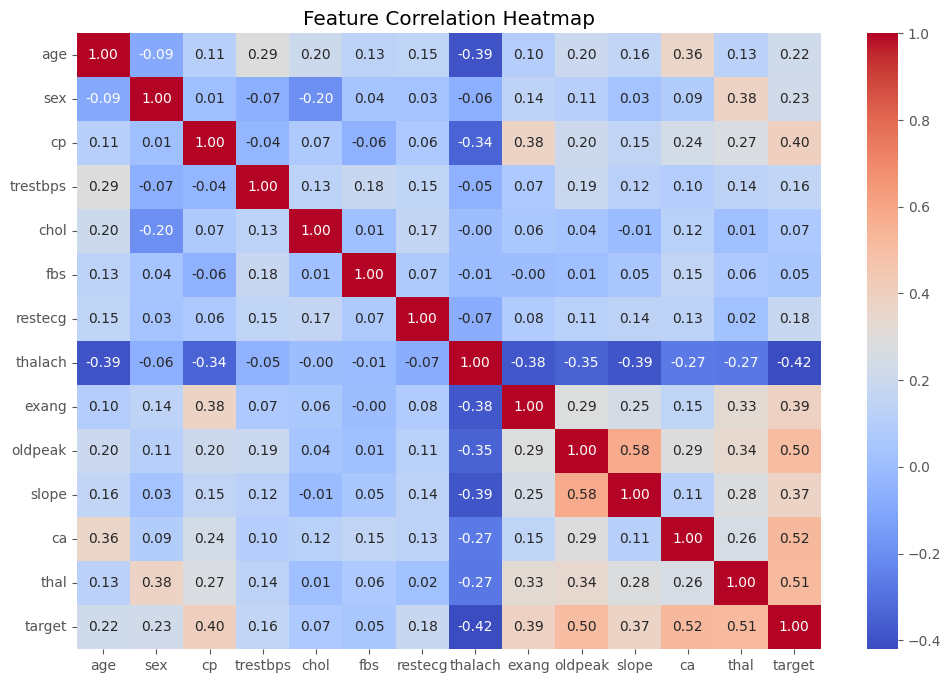

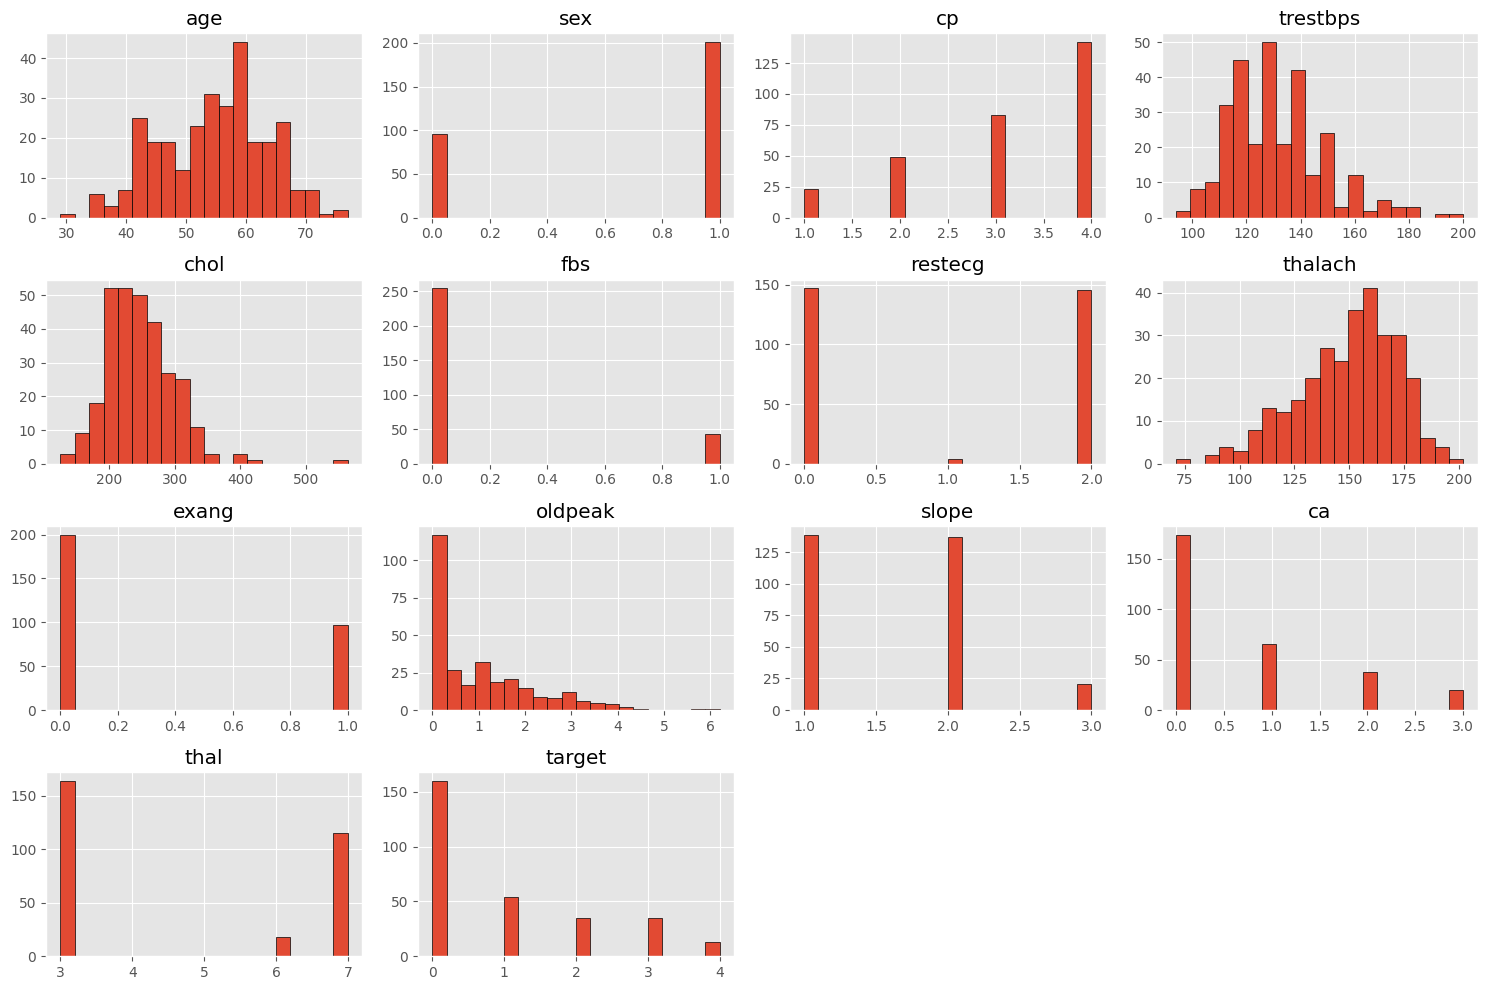

In [79]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
# Step 1: Load the dataset
df = pd.read_csv('processed_cleveland.csv')

# Step 2: Replace '?' with NaN and convert all to numeric
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Step 3: Drop rows with missing values
df.dropna(inplace=True)
print("Cleaned shape:", df.shape)

# Step 4: Separate features and label
X = df.drop(columns='target')  # Change 'target' if your column is named differently
y = df['target']

# Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 7: Plot feature histograms
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


In [80]:
#Feature Selection with RFE


# Step 3.1: Create a base model
model = LogisticRegression(max_iter=1000)

# Step 3.2: Apply RFE to select top N features
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_scaled, y)

# Step 3.3: Show selected features
selected_features = df.drop(columns='target').columns[rfe.support_]
feature_ranks = dict(zip(df.drop(columns='target').columns, rfe.ranking_))

print("✅ Selected Features (RFE):", list(selected_features))
print("📊 Feature Rankings (1 = selected):", feature_ranks)


✅ Selected Features (RFE): ['cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
📊 Feature Rankings (1 = selected): {'age': np.int64(3), 'sex': np.int64(2), 'cp': np.int64(1), 'trestbps': np.int64(5), 'chol': np.int64(6), 'fbs': np.int64(1), 'restecg': np.int64(1), 'thalach': np.int64(1), 'exang': np.int64(4), 'oldpeak': np.int64(1), 'slope': np.int64(1), 'ca': np.int64(1), 'thal': np.int64(1)}


In [81]:
#Logistic Regression

# Use selected features from RFE
X_selected = X_scaled[:, rfe.support_]

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Set up stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use scoring options suitable for multiclass
acc = cross_val_score(lr, X_selected, y, cv=cv, scoring='accuracy').mean()
f1 = cross_val_score(lr, X_selected, y, cv=cv, scoring='f1_weighted').mean()
roc = cross_val_score(lr, X_selected, y, cv=cv, scoring='roc_auc_ovr').mean()

print("📊 Logistic Regression Results (Multiclass):")
print(f"✅ Accuracy: {acc:.4f}")
print(f"🎯 F1 Score (weighted): {f1:.4f}")
print(f"🧠 ROC AUC (OvR): {roc:.4f}")
y = (df['target'] > 0).astype(int)


📊 Logistic Regression Results (Multiclass):
✅ Accuracy: 0.5724
🎯 F1 Score (weighted): 0.5322
🧠 ROC AUC (OvR): 0.7956


In [82]:
#Random forest

# 1. Load and clean the dataset
df = pd.read_csv("processed_cleveland.csv")
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)  # Now df has 297 rows

# 2. Define features and target from cleaned df
X = df.drop(columns='target')
y = df['target']

# 3. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Feature selection with RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_scaled, y)

# 5. Select top features
X_selected = X_scaled[:, rfe.support_]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Scores (for multiclass)
acc = cross_val_score(rf, X_selected, y, cv=cv, scoring='accuracy').mean()
f1 = cross_val_score(rf, X_selected, y, cv=cv, scoring='f1_weighted').mean()
roc = cross_val_score(rf, X_selected, y, cv=cv, scoring='roc_auc_ovr').mean()

print("\n📊 Random Forest Results (Multiclass):")
print(f"✅ Accuracy: {acc:.4f}")
print(f"🎯 F1 Score (weighted): {f1:.4f}")
print(f"🧠 ROC AUC (OvR): {roc:.4f}")




📊 Random Forest Results (Multiclass):
✅ Accuracy: 0.5723
🎯 F1 Score (weighted): 0.5404
🧠 ROC AUC (OvR): 0.7639


In [16]:
print("X_selected shape:", X_selected.shape)
print("y shape:", y.shape)

X_selected shape: (297, 8)
y shape: (297,)


In [83]:
#XGBoost Results

# Suppress XGBoost warnings
warnings.filterwarnings('ignore')

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Evaluate
acc = cross_val_score(xgb, X_selected, y, cv=cv, scoring='accuracy').mean()
f1 = cross_val_score(xgb, X_selected, y, cv=cv, scoring='f1_weighted').mean()
roc = cross_val_score(xgb, X_selected, y, cv=cv, scoring='roc_auc_ovr').mean()

# Print results
print("\n📊 XGBoost Results (Multiclass):")
print(f"✅ Accuracy: {acc:.4f}")
print(f"🎯 F1 Score (weighted): {f1:.4f}")
print(f"🧠 ROC AUC (OvR): {roc:.4f}")



📊 XGBoost Results (Multiclass):
✅ Accuracy: 0.5420
🎯 F1 Score (weighted): 0.5248
🧠 ROC AUC (OvR): 0.7514


In [21]:
# 📂 Step 2: Load and Clean Dataset
df = pd.read_csv('processed_cleveland.csv')
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# 🔁 Step 3: Convert target to binary (0 = no disease, 1 = has disease)
df['target'] = (df['target'] > 0).astype(int)

# 🎯 Step 4: Separate features and labels
X = df.drop(columns='target')
y = df['target']

# 📏 Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [22]:
# ✂️ Step 6: Feature Selection (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_scaled, y)
X_selected = X_scaled[:, rfe.support_]


In [23]:
# 🔁 Step 7: Train and Evaluate 4 Models with Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, name):
    acc = cross_val_score(model, X_selected, y, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_selected, y, cv=cv, scoring='f1').mean()
    roc = cross_val_score(model, X_selected, y, cv=cv, scoring='roc_auc').mean()
    print(f"\n📊 {name} Results (Binary):")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(f"🧠 ROC AUC:  {roc:.4f}")

# Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# Random Forest
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# XGBoost
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")

# SVM
evaluate_model(SVC(kernel='linear', probability=True), "SVM")



📊 Logistic Regression Results (Binary):
✅ Accuracy: 0.8349
🎯 F1 Score: 0.8154
🧠 ROC AUC:  0.9038

📊 Random Forest Results (Binary):
✅ Accuracy: 0.7913
🎯 F1 Score: 0.7609
🧠 ROC AUC:  0.8808

📊 XGBoost Results (Binary):
✅ Accuracy: 0.7711
🎯 F1 Score: 0.7462
🧠 ROC AUC:  0.8602

📊 SVM Results (Binary):
✅ Accuracy: 0.8280
🎯 F1 Score: 0.8090
🧠 ROC AUC:  0.9028


In [24]:

#Use an Ensemble
from sklearn.ensemble import StackingClassifier

ensemble = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression()
)

evaluate_model(ensemble, "Stacked Ensemble")



📊 Stacked Ensemble Results (Binary):
✅ Accuracy: 0.8215
🎯 F1 Score: 0.7961
🧠 ROC AUC:  0.8989


In [85]:
#Cross validation
# Step 1: Load & Clean Data


df = pd.read_csv('processed_cleveland.csv')
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Convert target to binary
df['target'] = (df['target'] > 0).astype(int)

# Split
X = df.drop(columns='target')
y = df['target']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check shape
print(" X shape:", X_scaled.shape)
print(" y shape:", y.shape)


 X shape: (297, 13)
 y shape: (297,)


In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, name):
    acc = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1').mean()
    roc = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc').mean()
    print(f"\n📊 {name} (Binary, All Features):")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"🎯 F1 Score: {f1:.4f}")
    print(f"🧠 ROC AUC:  {roc:.4f}")


In [86]:

warnings.filterwarnings("ignore")

# Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# Random Forest
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# XGBoost
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")








📊 Logistic Regression Performance:
✅ Accuracy : 0.8247
🎯 F1 Score : 0.7990
🧠 ROC AUC  : 0.8937

📊 Random Forest Performance:
✅ Accuracy : 0.8080
🎯 F1 Score : 0.7856
🧠 ROC AUC  : 0.8941

📊 XGBoost Performance:
✅ Accuracy : 0.7944
🎯 F1 Score : 0.7710
🧠 ROC AUC  : 0.8645


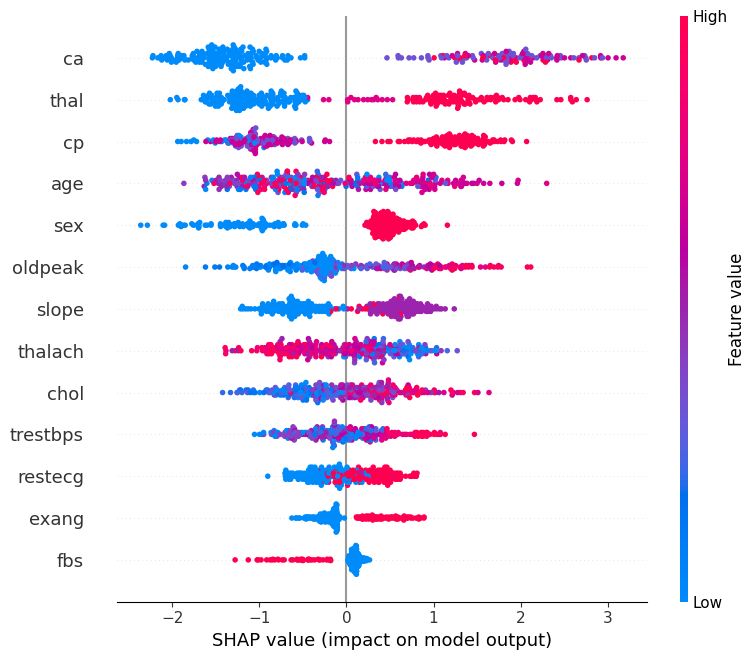

In [41]:
#SHAP with the XGBoost Model
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Step 1: Fit XGBoost model on the full data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_scaled, y)

# Step 2: Create SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_scaled)

# Step 3: Global Feature Importance
shap.summary_plot(shap_values, X_scaled, feature_names=X.columns)



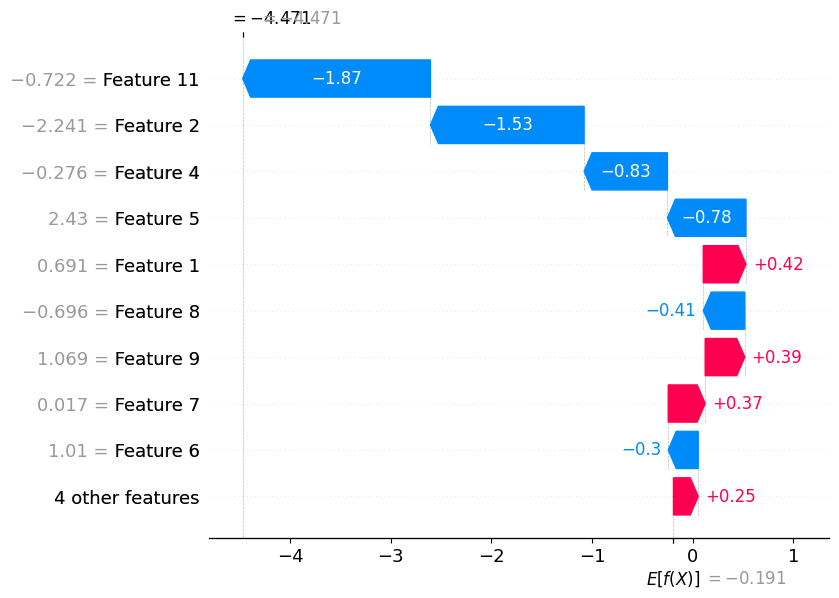

In [40]:
#Local Explanation for One Patient
shap.plots.waterfall(shap_values[0])


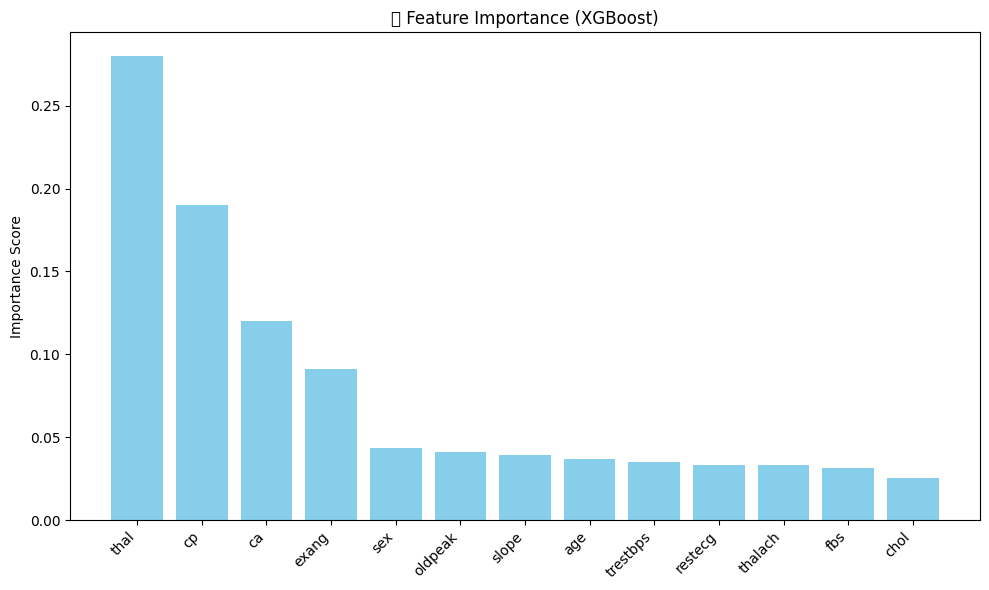

In [43]:

# 1. Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_scaled, y)

# 2. Get feature importances
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# 3. Plot bar chart
plt.figure(figsize=(10, 6))
plt.title("📊 Feature Importance (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center", color="skyblue")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_


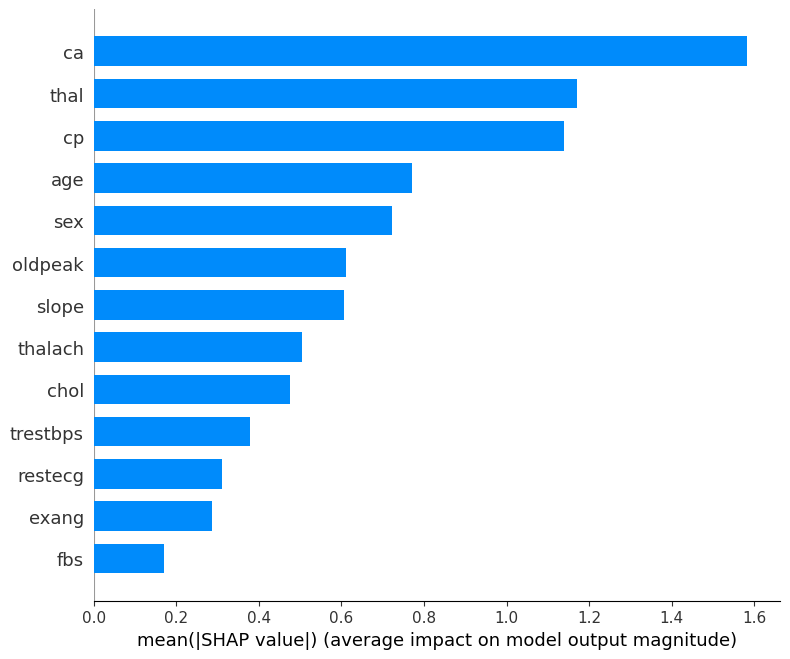

In [48]:
#SHAP Summary Plot (Bar Chart – Global Feature Importance)#
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# 1. Train XGBoost model on full dataset
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_scaled, y)

# 2. Create SHAP explainer and values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_scaled)
shap.summary_plot(shap_values, X_scaled, feature_names=X.columns, plot_type="bar")


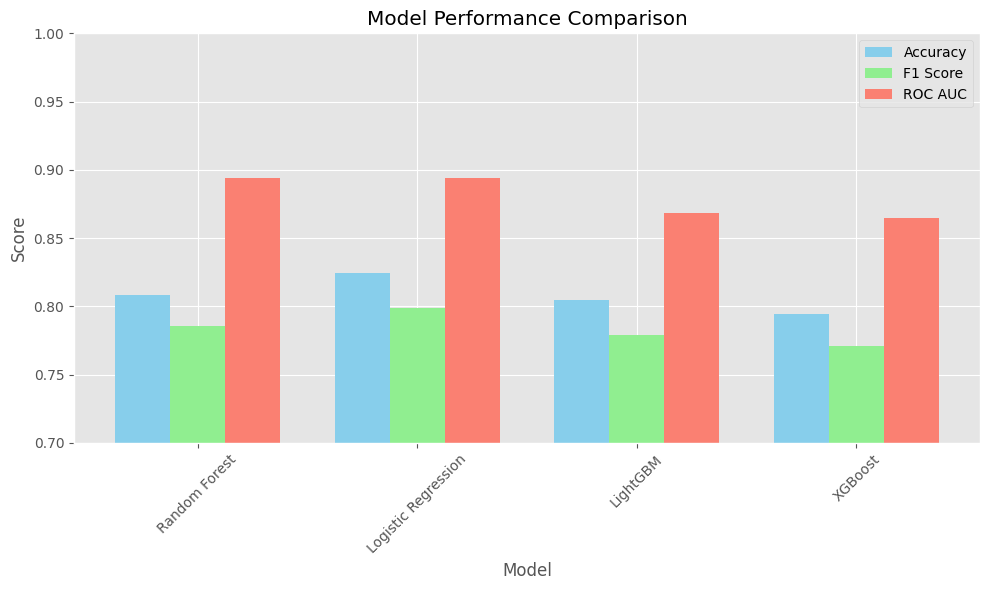

In [88]:
#Comparing Model performance Plot

# Use a safe built-in style
plt.style.use('ggplot')

# Plot configuration
fig, ax = plt.subplots(figsize=(10, 6))
x = results_df['Model']
bar_width = 0.25
x_axis = np.arange(len(x))

# Plot bars for Accuracy, F1 Score, and ROC AUC
plt.bar(x_axis - bar_width, results_df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x_axis, results_df['F1 Score'], width=bar_width, label='F1 Score', color='lightgreen')
plt.bar(x_axis + bar_width, results_df['ROC AUC'], width=bar_width, label='ROC AUC', color='salmon')

# Labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(ticks=x_axis, labels=results_df['Model'], rotation=45)
plt.ylim(0.7, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
#MLP Neural Network
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
evaluate_model(mlp_model, "MLP Neural Network")


📊 MLP Neural Network Performance:
✅ Accuracy : 0.7944
🎯 F1 Score : 0.7782
🧠 ROC AUC  : 0.8722
